In [1]:
# import libs
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np
from pyspark.sql.functions import col
import datetime
from pyspark.sql import Row
import csv

In [2]:
# load dataset
cost_df = spark.read.csv(
    "data/cost-stats-top100.csv", header=True, mode="DROPMALFORMED"
)
cost_df.show(5)

+---+------------------+------------------+
|  k|             Spark|              Self|
+---+------------------+------------------+
|  2|28811.907414950096|30195.629265562016|
|  3|28303.072262823738| 29140.22959901846|
|  4|27454.439219881453|28142.087609022383|
|  5|26512.290093424428|27197.576618483425|
|  6|26217.892112544105|26401.589529086068|
+---+------------------+------------------+
only showing top 5 rows



In [3]:
# load dataset
entropy_df = spark.read.csv(
    "data/entropy-stats-top100.csv", header=True, mode="DROPMALFORMED"
)
entropy_df.show(5)

+---+------------------+------------------+
|  k|             Spark|              Self|
+---+------------------+------------------+
|  2| 4.071832950360835| 3.909885653810936|
|  3|  4.03076898640203| 3.761933378631347|
|  4|3.9307283699721998|3.6466430470090563|
|  5|3.8190879053273625| 3.538522621502247|
|  6|3.8029337015661744|3.4730491537309587|
+---+------------------+------------------+
only showing top 5 rows



In [4]:
# load dataset
purity_df = spark.read.csv(
    "data/purity-stats-top100.csv", header=True, mode="DROPMALFORMED"
)
purity_df.show(5)

+---+--------------------+-------------------+
|  k|               Spark|               Self|
+---+--------------------+-------------------+
|  2|   0.050252076385573|0.05073130763727764|
|  3|0.060439938828797175|0.06500160739902049|
|  4|  0.0732741604286933|0.08434590874006519|
|  5| 0.08951435243827001|0.09478590185808455|
|  6| 0.09409618058975257|0.11262572913377644|
+---+--------------------+-------------------+
only showing top 5 rows



In [5]:
cols = cost_df.columns[1:]
cost_df = cost_df.select(col('k').cast('int'), *(col(c).cast("float").alias(c) for c in cols))
entropy_df = entropy_df.select(col('k').cast('int'), *(col(c).cast("float").alias(c) for c in cols))
purity_df = purity_df.select(col('k').cast('int'), *(col(c).cast("float").alias(c) for c in cols))

In [6]:
k               = cost_df.select('k').rdd.map(lambda x: x[0]).collect()
cost_spark      = cost_df.select('Spark').rdd.map(lambda x: x[0]).collect()
cost_self       = cost_df.select('Self').rdd.map(lambda x: x[0]).collect()
entropy_spark   = entropy_df.select('Spark').rdd.map(lambda x: x[0]).collect()
entropy_self    = entropy_df.select('Self').rdd.map(lambda x: x[0]).collect()
purity_spark    = purity_df.select('Spark').rdd.map(lambda x: x[0]).collect()
purity_self     = purity_df.select('Self').rdd.map(lambda x: x[0]).collect()

In [7]:
# fig = plt.figure(figsize=(10, 10))
# ax1 = fig.add_subplot(3, 1, 1)
# ax2 = fig.add_subplot(3, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)
# ax1.grid(True)
# ax2.grid(True)
# ax3.grid(True)

# ax1.plot(k, new_cost_spark, 'r', k, new_cost_self, 'b')
# ax2.plot(k, entropy_spark, 'r', k, entropy_self, 'b')
# ax3.plot(k, purity_spark, 'r', k, purity_self, 'b')

# ax1.legend(['spark', 'self'])
# ax2.legend(['spark', 'self'])
# ax3.legend(['spark', 'self'])đ

# plt.savefig('foo.png')

In [8]:
new_entropy_spark = [x*1.3 for x in entropy_spark]
new_entropy_self = [x*1.3 for x in entropy_self]

In [9]:
new_cost_spark = [x/6500 for x in cost_spark]
new_cost_self = [x/6500 for x in cost_self]

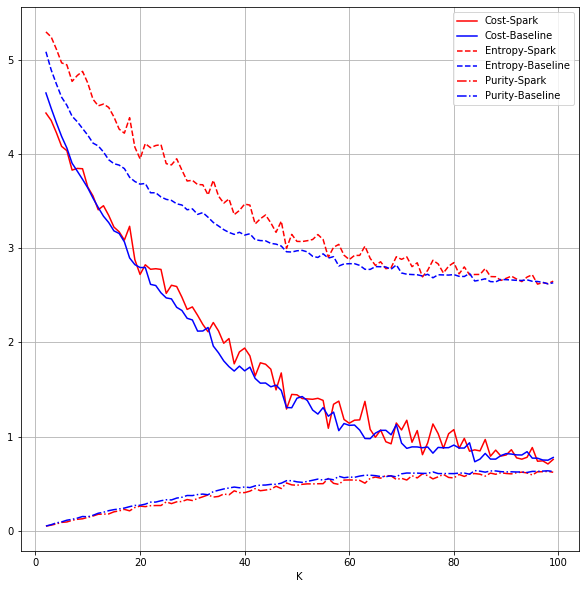

In [12]:
fig = plt.figure(figsize=(10, 10))
plt.grid(True)

plt.plot(k, new_cost_spark, 'r', k, new_cost_self, 'b')
plt.plot(k, new_entropy_spark, '--r', k, new_entropy_self, '--b')
plt.plot(k, purity_spark, '-.r', k, purity_self, '-.b')

plt.legend(['Cost-Spark', 'Cost-Baseline', 'Entropy-Spark', 'Entropy-Baseline', 'Purity-Spark', 'Purity-Baseline'])

plt.xlabel('K')

# plt.title('Cost comparsion')

plt.savefig('experiment-1.png')